In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/gt_2015.csv")

In [3]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [4]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

1. Prueba la regresión polinomios utilizando 3 variables diferentes del Dataset gt_2015.csv, utilizando 2 grados diferentes de polinomio a tu elección y evalúa cada una de las configuraciones con R cuadrado.

REGRESION DE GRADO  2 PARA VARIABLE  AT
a:  [[ 0.         -1.58685149  0.02301749]]
intercept:  [78.92934839]


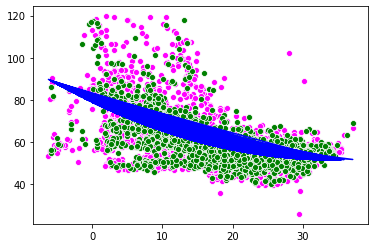

MSE=  68.14198515020101
r2_score=  0.4016072415464098
*************************************************************************
REGRESION DE GRADO  3 PARA VARIABLE  AT
a:  [[ 0.         -0.00185245 -0.10236278  0.00263453]]
intercept:  [74.81346228]


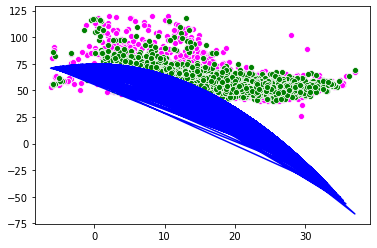

MSE=  65.52615834636634
r2_score=  0.4245782749457625
*************************************************************************
REGRESION DE GRADO  2 PARA VARIABLE  AP
a:  [[ 0.00000000e+00 -3.60178816e+01  1.78965464e-02]]
intercept:  [18179.83355398]


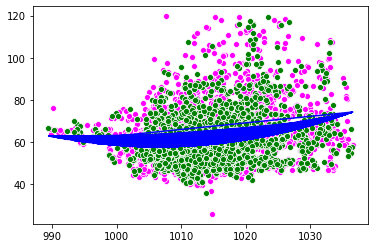

MSE=  118.65466629926873
r2_score=  0.05935304492436866
*************************************************************************
REGRESION DE GRADO  3 PARA VARIABLE  AP
a:  [[ 0.00000000e+00 -2.90348552e+03  2.84302457e+00 -9.27755153e-04]]
intercept:  [988275.59428497]


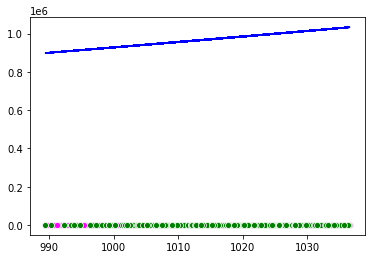

MSE=  117.28681126465104
r2_score=  0.07019685506203988
*************************************************************************
REGRESION DE GRADO  2 PARA VARIABLE  AH
a:  [[ 0.          0.38657189 -0.00251383]]
intercept:  [45.76210438]


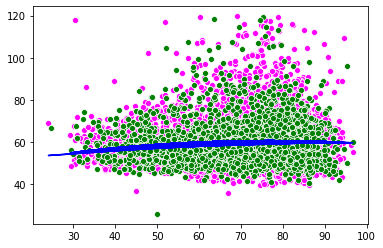

MSE=  114.65701583479523
r2_score=  0.0016773826591418572
*************************************************************************
REGRESION DE GRADO  3 PARA VARIABLE  AH
a:  [[ 0.00000000e+00 -2.66969559e+00  4.72070506e-02 -2.60183953e-04]]
intercept:  [105.78396468]


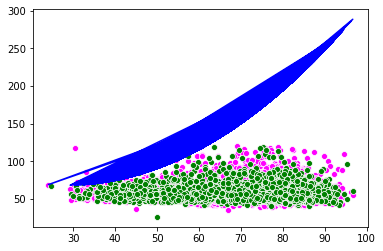

MSE=  114.23433136724059
r2_score=  0.005357710992180631
*************************************************************************


In [10]:
cols_X=['AT', 'AP', 'AH']

for i in cols_X:
    X=np.array(df[[i]])
    y=np.array(df[['NOX']])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    for j in range(2,4):
        print("REGRESION DE GRADO ",j,"PARA VARIABLE ",i)
        poly = PolynomialFeatures(degree=j)
        X_train_poly = poly.fit_transform(X_train)
        regresion_poly = linear_model.LinearRegression()
        regresion_poly.fit(X_train_poly, y_train)
        print ('a: ', regresion_poly.coef_)
        print ('intercept: ',regresion_poly.intercept_)
        sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
        sns.scatterplot(X_test.flatten(),y_test.flatten(), color="green") #prueba 
        plt.plot(X_train, regresion_poly.coef_[0][1]*X_train + (regresion_poly.coef_[0][2]*X_train**2)+ regresion_poly.intercept_[0], '-b')
        plt.show()
        X_test_poly = poly.fit_transform(X_test)
        yhat = regresion_poly.predict(X_test_poly)
        MSE=mean_squared_error(yhat,y_test)
        print("MSE= ",MSE)
        score=r2_score(y_test,yhat)
        print("r2_score= ",score)
        print("*************************************************************************")
    
    

2. Busca el Producto Interno Bruto (GDP) de España y ajusta la curva sigmoidal para hacer predicciones. Evalúa las predicciones con R cuadrado. 

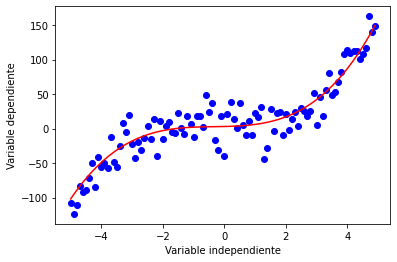

In [11]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_ruido = 20 * np.random.normal(size=x.size)
ydata = y + y_ruido
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

In [79]:
PIB=[1.244757e+10,1.202193e+10,1.161878e+10,1.113840e+10,1.0509e+10,1.032158e+10,1.020348e+10,1.031099e+10,1.063763e+1,
1.072709e+10,1.069323e+10,1.109541e+10,1.075539e+10,1.003823e+10,9.27357e+10,8.59437e+9,8.02266e+9,7.49552e+9,
7.09552e+9,6.47851e+9,5.95723e+9,5.55993e+9,5.19268e+9,4.89203e+9,4.59337e+9,4.25089e+9,4.25936e+9,4.63263e+9,
4.43715e+9,4.01686e+9,3.57882e+9,3.02674e+9,2.63138e+9,2.43382e+9,2.26288e+9,2.07776e+9,1.82781e+9,1.90291e+9,
1.73339e+9,1.59100e+9]
PIB.reverse()

In [84]:
df2=pd.DataFrame(columns=["year","PIB"])
#df2.drop(df.index[31],axis=1)
df2['year']=range(1980,2020)
df2["PIB"]=PIB
df2=df2[(df2["year"]!=2011)&(df2["year"]!=2005)]
df2

,year,PIB
0,1980,1.591000e+09
1,1981,1.733390e+09
2,1982,1.902910e+09
3,1983,1.827810e+09
4,1984,2.077760e+09
5,1985,2.262880e+09
6,1986,2.433820e+09
7,1987,2.631380e+09
8,1988,3.026740e+09
9,1989,3.578820e+09


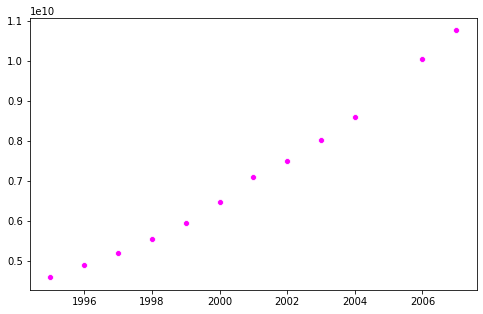

In [86]:
df3=df2[df2["year"].between(1995,2007)]
X = df3["year"].tolist()
Y = df3["PIB"].tolist()
plt.figure(figsize=(8,5))
sns.scatterplot(X, Y, color="magenta")
plt.show()

In [87]:
X = df3["year"].values
y = df3["PIB"].values
# Normalizamos los datos
X_norm =X/max(X)
Y_norm =y/max(y)

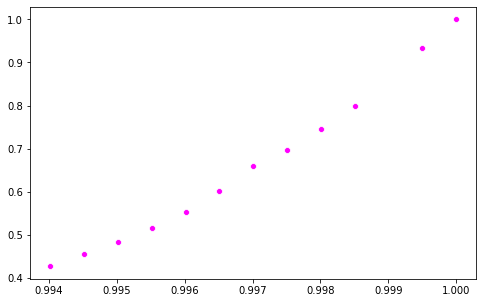

In [88]:
plt.figure(figsize=(8,5))
sns.scatterplot(X_norm, Y_norm, color="magenta")
plt.show()

In [90]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

In [91]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, X_norm, Y_norm)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 437.875914, beta_2 = 0.995212


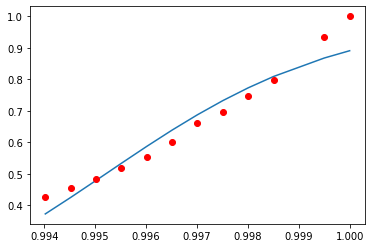

In [92]:
beta_1 = 437.875914
beta_2 = 0.995212
#logistic function
Y_pred = sigmoid(X_norm, beta_1 , beta_2)
#plot initial prediction against datapoints
plt.plot(X_norm, Y_pred)
plt.plot(X_norm, Y_norm, 'ro')

In [ ]:
#Utilizamos la función train_test_split de sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [94]:
prueba = np.random.rand(len(df3)) < 0.8
train_x = X[prueba]
test_x = X[~prueba]
train_y = y[prueba]
test_y = y[~prueba]

In [95]:
popt, pcov  = curve_fit(sigmoid, train_x, train_y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [97]:
y_hat = sigmoid(test_x, *popt)

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

R2-score: 0.00


In [98]:
y_hat

array([1., 1., 1., 1., 1., 1., 1.])